In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


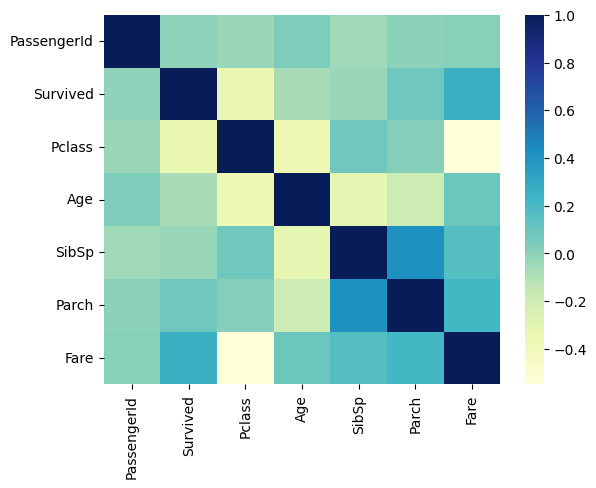

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = titanic_data.select_dtypes(include=[np.number])


sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]


In [6]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.00,0,0,2667,7.2250,NaN,C
67,68,0,3,"Crease, Mr. Ernest James",male,19.00,0,0,S.P. 3464,8.1583,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.00,0,0,349228,10.1708,NaN,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S


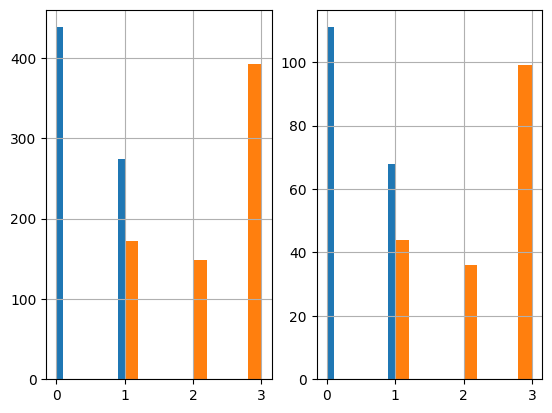

In [7]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [8]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_age = X["Age"].median()
        return self

    def transform(self, X):
        X = X.copy() 
        X["Age"] = X["Age"].fillna(self.median_age) 
        return X



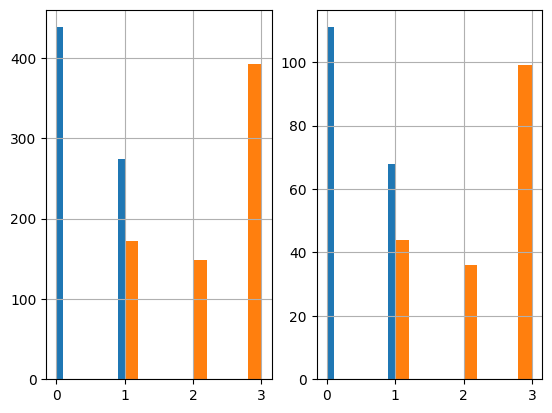

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

# Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

# Visualization
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

strat_train_set.info()

#Imputing Data (AgeImputer)
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_age = X["Age"].median()
        return self

    def transform(self, X):
        X = X.copy() 
        X["Age"] = X["Age"].fillna(self.median_age) 
        return X


class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("FeatureEncoder pre-columns:", X.columns)

        if 'Embarked' not in X.columns:
            print("Warning: The 'Embarked' column could not be found!")
            return X  

        encoder = OneHotEncoder(sparse_output=False) 
        matrix = encoder.fit_transform(X[['Embarked']])

    
        column_names = encoder.categories_[0].tolist()

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix[:, i]

        return X.drop(["Embarked"], axis=1)

# Feature Dropper
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")


pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])




In [55]:
strat_train_set = pipeline.fit_transform(strat_train_set)

FeatureEncoder pre-columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [56]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,NaN
867,868,0,1,31.0,0,0,50.4958,0.0,0.0,1.0,0.0
619,620,0,2,26.0,0,0,10.5000,0.0,0.0,1.0,0.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0
286,287,1,3,30.0,0,0,9.5000,0.0,0.0,1.0,0.0
834,835,0,3,18.0,0,0,8.3000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,50.0,0,0,8.0500,0.0,0.0,1.0,0.0
518,519,1,2,36.0,1,0,26.0000,0.0,0.0,1.0,0.0
54,55,0,1,65.0,0,1,61.9792,1.0,0.0,0.0,0.0
603,604,0,3,44.0,0,0,8.0500,0.0,0.0,1.0,0.0


In [57]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Q            712 non-null    float64
 9   S            712 non-null    float64
 10  nan          712 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 66.8 KB


In [61]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
X.columns = X.columns.astype(str)
X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(0)  


scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [62]:
X_data

array([[ 1.6422641 , -1.56828591,  0.12354285, ..., -0.31963602,
         0.61197825, -0.05307449],
       [ 0.67661178, -0.37019624, -0.26296623, ..., -0.31963602,
         0.61197825, -0.05307449],
       [-1.53893728,  0.82789342, -1.73170073, ..., -0.31963602,
         0.61197825, -0.05307449],
       ...,
       [-1.52336225, -1.56828591,  2.75180459, ..., -0.31963602,
        -1.63404501, -0.05307449],
       [ 0.61431163,  0.82789342,  1.12846645, ..., -0.31963602,
         0.61197825, -0.05307449],
       [ 1.38916974, -1.56828591, -1.42249347, ..., -0.31963602,
         0.61197825, -0.05307449]], shape=(712, 10))

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    { "n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)
    

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [65]:
final_clf = grid_search.best_estimator_

In [66]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=500)

In [68]:
strat_test_set = pipeline.fit_transform(strat_test_set)

FeatureEncoder pre-columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [73]:
X_data = pd.DataFrame(X_data)  
X_data_test = pd.DataFrame(X_data_test)  


X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']


X_data_test = X_data_test.reindex(columns=X_data.columns, fill_value=0)


scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_data_test)


y_data_test = y_test.to_numpy()


In [74]:
final_clf.score(X_data_test, y_data_test)

0.776536312849162

In [75]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
final_data = pipeline.fit_transform(titanic_data)

FeatureEncoder pre-columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [78]:
X_final = pd.DataFrame(X_final)
X_final.columns = X_final.columns.astype(str)

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)

y_data_final = y_final.to_numpy()


In [79]:
prod_clf = RandomForestClassifier()

param_grid = [    
    { "n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)
    
    

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [80]:
prod_final_clf = grid_search.best_estimator_

In [82]:
titanic_test_data = pd.read_csv("test.csv")

In [83]:
final_test_data = pipeline.fit_transform(titanic_test_data)

FeatureEncoder pre-columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
X_data_final_test = pd.DataFrame(X_data_final_test)

X_data_final_test = X_data_final_test.reindex(columns=X_data.columns, fill_value=0)

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_data_final_test)

predictions = prod_final_clf.predict(X_data_final_test)


In [108]:
predictions = prod_final_clf.predict(X_data_final_test)